In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import gmaps
from scipy.stats import linregress
# Configure gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
airbnb_data = pd.read_csv("cities_with_all_interests_crimes.csv")


In [3]:
airbnb_data[['id','street','zipcode',
             'neighbourhood','crime','crime counts','price','weekly_price','monthly_price','host_is_superhost']].head()

,id,street,zipcode,neighbourhood,crime,crime counts,price,weekly_price,monthly_price,host_is_superhost
0,27402246,"Los Angeles, CA, United States",90026.0,Echo Park,47879.0,2740.0,85.0,0,0,f
1,5627346,"Los Angeles, CA, United States",90068.0,Cahuenga Pass,47879.0,0.0,69.0,$450.00,"$1,595.00",f
2,39090938,"Los Angeles, CA, United States",90004.0,Mid-Wilshire,47879.0,2234.0,150.0,0,0,f
3,20678163,"Los Angeles, CA, United States",90066.0,Mar Vista,47879.0,0.0,81.0,0,0,f
4,5299075,"Santa Monica, CA, United States",90401.0,Santa Monica,7166.0,0.0,94.0,0,0,f


In [36]:

airbnb_data['zipcode'].max()
airbnb_data['zipcode'].unique()


array([90026., 90068., 90004., 90066., 90401., 90036., 91501., 90005.,
       91505., 90035., 90020., 90815., 90062., 90069., 91343., 90015.,
       90037., 90017., 90042., 90049., 90291., 90013., 90806., 90803.,
       91606., 90018., 90025., 90028., 90808., 90019., 91306., 91801.,
       90038., 90405., 91201., 90046., 90014., 90301., 91040., 90212.,
       90403., 90302., 90006., 90029., 90404., 91206., 90027., 90024.,
       90813., 91601., 90016., 91204., 90210., 90094., 90211., 90012.,
       91325., 91107., 91367., 90303., 90064., 91406., 90814., 90039.,
       90057., 91316., 90272., 90293., 91208., 90007., 91202., 90048.,
       90043., 91344., 91331., 90033., 91101., 90065., 91411., 90802.,
       91307., 91104., 91607., 90305.,     0., 91403., 91803., 91602.,
       90011., 91311., 90034., 91105., 91342., 90041., 90031., 90008.,
       91401., 90032., 91335., 91205., 91604., 91605., 91504., 90732.,
       90804., 90045., 91364., 91506., 91356., 90805., 90063., 91103.,
      

In [37]:
airbnb_data[['id','street','zipcode'
             ,'neighbourhood','crime','crime counts','price','weekly_price','monthly_price']].head()

,id,street,zipcode,neighbourhood,crime,crime counts,price,weekly_price,monthly_price
0,27402246,"Los Angeles, CA, United States",90026.0,Echo Park,47879.0,2740.0,85.0,0,0
1,5627346,"Los Angeles, CA, United States",90068.0,Cahuenga Pass,47879.0,0.0,69.0,$450.00,"$1,595.00"
2,39090938,"Los Angeles, CA, United States",90004.0,Mid-Wilshire,47879.0,2234.0,150.0,0,0
3,20678163,"Los Angeles, CA, United States",90066.0,Mar Vista,47879.0,0.0,81.0,0,0
4,5299075,"Santa Monica, CA, United States",90401.0,Santa Monica,7166.0,0.0,94.0,0,0


The r-squared is: 0.15245219487906508


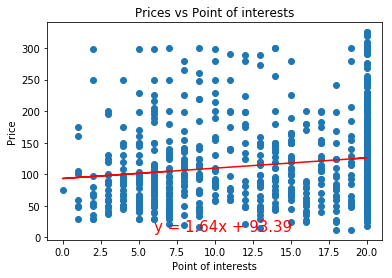

In [38]:
x_values = airbnb_data['# point of interest']
y_values = airbnb_data['price']

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Prices vs Point of interests")
plt.xlabel('Point of interests')
plt.ylabel('Price')
print(f"The r-squared is: {rvalue}")
plt.savefig("figs/f-pt-pr")
plt.show()

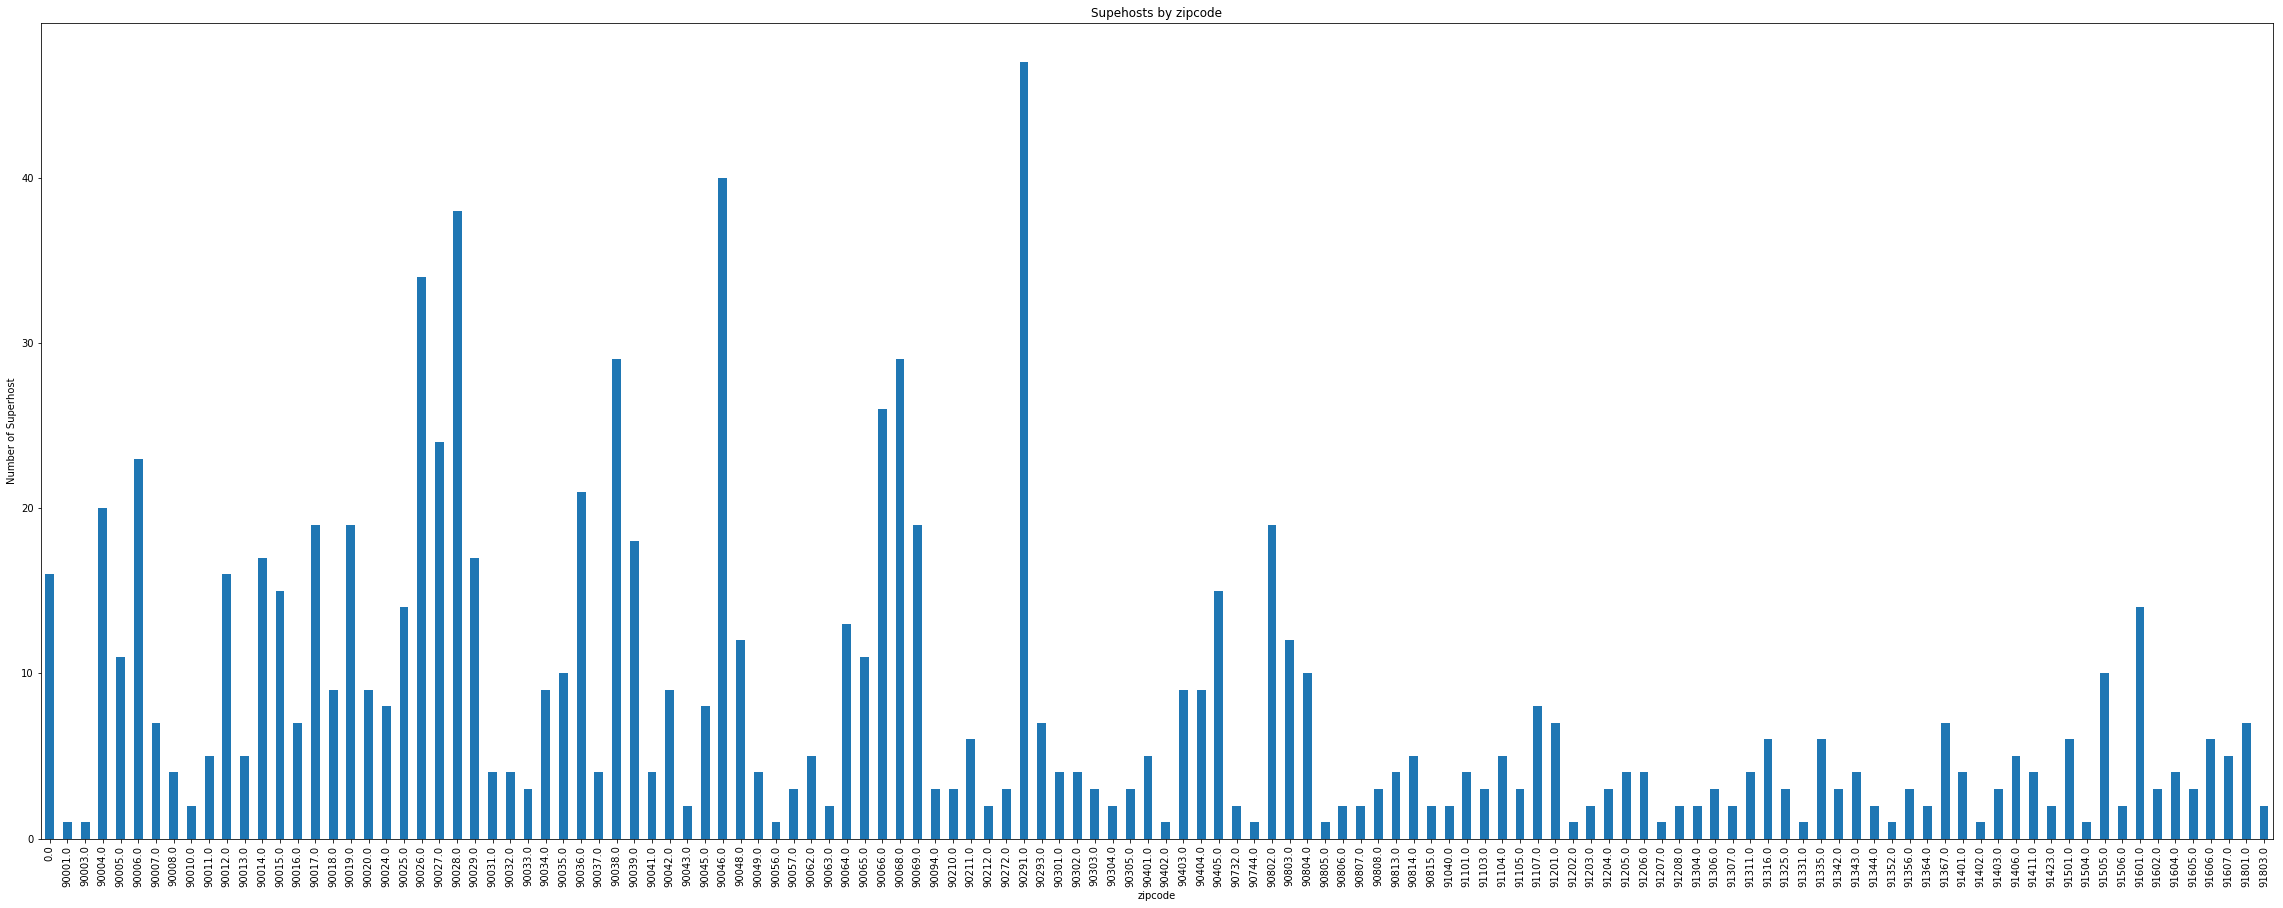

<Figure size 432x288 with 0 Axes>

In [39]:
super_host_num = airbnb_data.groupby('zipcode')['host_is_superhost'].count()
plt.figure(figsize=(40,15))
super_host_chart = super_host_num.plot(kind="bar", title="Supehosts by zipcode")
super_host_chart.set_xlabel("zipcode")
super_host_chart.set_ylabel("Number of Superhost")

plt.show()
plt.tight_layout()

In [40]:
neighbor_bnb1 = airbnb_data[airbnb_data['zipcode']==90046]
neighbor_bnb1['neighbourhood'].unique()
neighbor_bnb2 = airbnb_data[airbnb_data['zipcode']==90291]
neighbor_bnb2['neighbourhood'].unique()

array(['Venice', 'Marina Del Rey'], dtype=object)

In [70]:
superhost_count = airbnb_data.loc[airbnb_data['host_is_superhost']=='t']

super_grouped = superhost_count.groupby('zipcode')['host_is_superhost'].count()



In [56]:
locations = airbnb_data[["latitude","longitude","zipcode"]]


In [69]:
super_locations = locations.merge(super_grouped, on='zipcode')
g

In [65]:
# Plot Heatmap"latitude","longitude"
fig = gmaps.figure(map_type="HYBRID")
location1 = super_locations[["latitude","longitude"]]


In [66]:
# Create heat layer
heat_layer = gmaps.heatmap_layer(location1, weights=super_locations["host_is_superhost"], 
                                 max_intensity=500,
                                 point_radius=5)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

The r-squared is: -0.05458866758641763


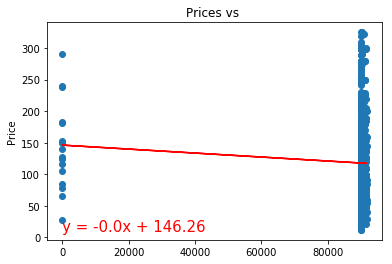

In [13]:


x_values = airbnb_data['zipcode']
y_values = airbnb_data['price']

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Prices vs ")
plt.xlabel('')
plt.ylabel('Price')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.6178283400221946


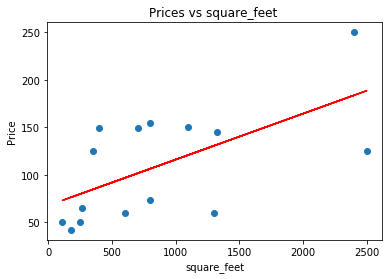

In [20]:
data = airbnb_data.loc[airbnb_data['square_feet']>0]
x_values = data['square_feet']
y_values = data['price']

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Prices vs square_feet ")
plt.xlabel('square_feet')
plt.ylabel('Price')
print(f"The r-squared is: {rvalue}")
plt.savefig("figs/f-sqr-pr")
plt.show()